## Download and prepare the dataset

Set up the posits as default

In [1]:
import tensorflow.python.keras as k
k.backend.floatx()

2023-07-17 01:01:58.360199: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/write/count
2023-07-17 01:01:58.360261: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/read/count
2023-07-17 01:01:58.360267: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/write/api
2023-07-17 01:01:58.360270: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/read/api


'float32'

In [2]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow import random

random.set_seed(1024)

def random_normal_init(shape, dtype=None):
    return random.normal(shape, dtype="float32")

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images[:20000].reshape((20000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels[:20000])
test_labels = to_categorical(test_labels)

print("The type of the training and test set samples is a {0} of {1}".format(type(train_images), type(train_images[0][0][0][0])))

The type of the training and test set samples is a <class 'numpy.ndarray'> of <class 'numpy.float32'>


In [3]:
train_images.shape

(20000, 28, 28, 1)

## Download and prepare the dataset

In [21]:
from tensorflow.python.keras import layers
from tensorflow.python.keras import models
import dropout

#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(10, activation='softmax'))

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1), kernel_initializer=random_normal_init))
# model.add(layers.MaxPooling2D((2, 2),input_shape=(28, 28, 1)))
# model.add(layers.Flatten(input_shape=(28, 28, 1)))
# model.add(layers.Dense(128, activation="tanh", kernel_initializer=random_normal_init))
# model.add(layers.Dense(10, activation='softmax',kernel_initializer=random_normal_init))

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2),input_shape=(28, 28, 1)))
# model.add(layers.Flatten(input_shape=(28, 28, 1)))
# model.add(layers.Dense(128, activation="tanh"))
# model.add(layers.Dense(10, activation='softmax'))

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(dropout.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax',kernel_initializer=random_normal_init))


Let's display the architecture of our convnet so far:

In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 32)         

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [23]:
optimizer = k.optimizers.adam_v2.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer,
              loss=k.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [24]:
model.get_weights()

[array([[[[ 1.973137  ,  1.5157319 , -2.1585655 ,  0.46078366,
            0.84139353, -0.92850095,  0.15547948,  0.02369235,
           -0.59716344, -1.4617317 ,  1.6546487 ,  1.954719  ,
           -1.2658241 ,  1.8699844 ,  0.400265  ,  1.597318  ,
            0.8100925 ,  0.30820575,  0.19443466,  0.02249419,
           -2.477315  ,  0.41182742,  0.7864311 ,  1.4224933 ,
            1.4696897 ,  1.2905792 ,  0.33092657,  0.7562669 ,
            0.23273368, -0.2213324 , -0.04173127, -1.1160982 ]],
 
         [[-2.1993296 ,  0.43180335,  1.8151481 ,  0.93543035,
            0.8317773 ,  1.8219433 , -0.63564813,  0.24716915,
           -0.01159769, -2.191323  ,  0.55520016, -1.217875  ,
            0.1068495 , -0.8478803 ,  0.98970366, -0.9607046 ,
           -0.12460664,  0.12405217,  0.67744774,  0.07623001,
           -0.77625126, -1.3653208 ,  0.7712119 , -0.8535983 ,
            0.53432417,  1.1584495 ,  2.409144  ,  1.1572666 ,
           -0.9710533 , -1.9992703 ,  0.5460122 ,  

In [25]:
earlystop_callback = k.callbacks.EarlyStopping(monitor='val_accuracy',patience=6)

history = model.fit(train_images, train_labels, epochs=500, batch_size=125, validation_split=0.1, callbacks=[earlystop_callback])

Epoch 1/500
144/144 [==============================] - 3s 17ms/step - loss: 943.2552 - accuracy: 0.1649 - val_loss: 201.0405 - val_accuracy: 0.3785
Epoch 2/500
144/144 [==============================] - 2s 16ms/step - loss: 276.1382 - accuracy: 0.3331 - val_loss: 88.8898 - val_accuracy: 0.5585
Epoch 3/500
144/144 [==============================] - 2s 17ms/step - loss: 146.0518 - accuracy: 0.4532 - val_loss: 55.8758 - val_accuracy: 0.6410
Epoch 4/500
144/144 [==============================] - 3s 18ms/step - loss: 93.7662 - accuracy: 0.5226 - val_loss: 41.5921 - val_accuracy: 0.6790
Epoch 5/500
144/144 [==============================] - 3s 18ms/step - loss: 66.2682 - accuracy: 0.5644 - val_loss: 30.8849 - val_accuracy: 0.6965
Epoch 6/500
144/144 [==============================] - 3s 21ms/step - loss: 52.8176 - accuracy: 0.5818 - val_loss: 25.9580 - val_accuracy: 0.7075
Epoch 7/500
144/144 [==============================] - 3s 21ms/step - loss: 42.0171 - accuracy: 0.6033 - val_loss: 21.44

In [26]:
model.get_weights()

[array([[[[ 1.76889396e+00,  1.49000752e+00, -2.30006552e+00,
            2.69655675e-01,  5.55657268e-01, -9.69535232e-01,
            3.02031457e-01, -1.47947550e-01, -5.97935796e-01,
           -1.34578288e+00,  1.42351007e+00,  2.03361893e+00,
           -9.96511996e-01,  2.01599741e+00,  3.25828969e-01,
            1.39291632e+00,  6.57444894e-01,  3.23291361e-01,
            2.42636204e-01, -8.71108845e-02, -2.41135645e+00,
            3.30960572e-01,  4.58537281e-01,  1.30524778e+00,
            1.13385510e+00,  1.04837894e+00,  2.97582358e-01,
            5.36675394e-01,  5.45454681e-01,  1.98907405e-01,
            1.21985292e-02, -1.09990692e+00]],
 
         [[-2.11734223e+00,  3.77694517e-01,  1.50311816e+00,
            7.29471922e-01,  5.62980533e-01,  1.70670819e+00,
           -5.30657470e-01,  1.47100482e-02, -3.18053290e-02,
           -2.13574839e+00,  4.40438181e-01, -1.14052498e+00,
            1.82481885e-01, -6.49072587e-01,  8.27617466e-01,
           -1.0597363

**Results of the training phase**

In the following cell we've obtained the plots of the accuracy and loss for both
the training and validation set.

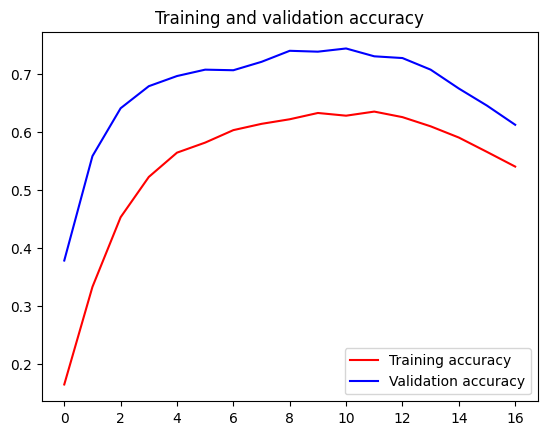

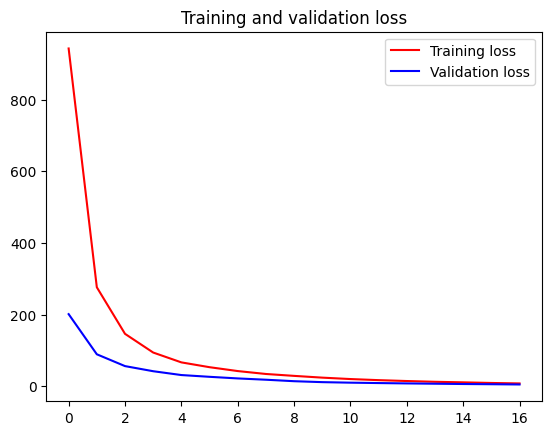

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##  Evaluating the model on the test set

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 4.6726 - accuracy: 0.5828


In [17]:
test_acc

0.9115999937057495

In [18]:
prediction = model.predict(train_images[:1])
print("prediction shape:", prediction.shape)
prediction

prediction shape: (1, 10)


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.4251195e-30,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [19]:
print(random_normal_init((10,)))


tf.Tensor(
[-0.25138396  1.7331516  -0.34837875 -0.49174917 -1.0303775   0.65026253
 -1.1111982  -1.276356   -0.8411003  -2.0826323 ], shape=(10,), dtype=float32)


In [20]:
initializer = k.initializers.GlorotUniform()
values = initializer(shape=(10,), dtype="posit160")
print(values)

tf.Tensor(
[-0.546143 -0.544922 -0.545654 -0.539062 -0.545166 -0.541016 -0.544434
 -0.542236 -0.54248 -0.544678], shape=(10,), dtype=posit160)
